<a href="https://colab.research.google.com/github/ayushmangupta/TF2/blob/master/TFP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TensorFlow Probability is a library for probabilistic reasoning and statistical analysis**

- Modelling 
- Inference
- Criticism

#### Lower level components :

 - Bijectors
 - Distributions
 
####  High Level Components: 
 
 - MCMC
 - Probabilistic Layer
 - Structural Time Series
 - Optimizers
 - GLMs
 - Edward2
 

In [0]:
#!pip install --upgrade tensorflow-probability

In [125]:
%matplotlib inline
import tensorflow as tf
tf.enable_eager_execution()
import tensorflow_probability as tfp
import numpy as np
import tensorflow.keras as tfk
from tensorflow_probability import distributions as tfd 
import matplotlib.pyplot as plt
tfb = tfp.bijectors
import seaborn as sns
sns.reset_defaults()
sns.set_context(context='talk',font_scale=0.7)
plt.rcParams['image.cmap'] = 'viridis'
print(tf.__version__)

1.14.0-rc1


In [0]:
#@title Utils { display-mode: "form" }
def print_subclasses_from_module(module, base_class, maxwidth=80):
  import functools, inspect, sys
  subclasses = [name for name, obj in inspect.getmembers(module)
                if inspect.isclass(obj) and issubclass(obj, base_class)]
  def red(acc, x):
    if not acc or len(acc[-1]) + len(x) + 2 > maxwidth:
      acc.append(x)
    else:
      acc[-1] += ", " + x
    return acc
  print('\n'.join(functools.reduce(red, subclasses, [])))


**Poission Distribution**

In [0]:
poi = tfd.Poisson(rate=3)


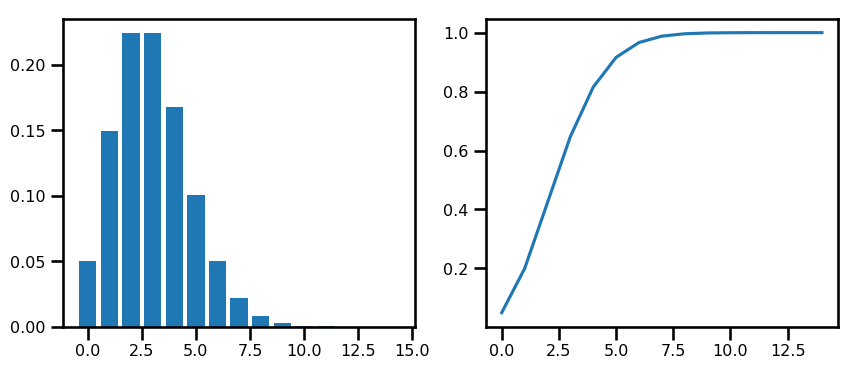

In [124]:
plt.figure(figsize=(10,4))
x = np.arange(15)
plt.subplot(1,2,1)
plt.bar(x=x, height=poi.prob(x))
plt.subplot(122)
plt.plot(x,poi.cdf(x))

In [58]:
print_subclasses_from_module(tfd,tfd.Distribution)

Autoregressive, BatchReshape, Bernoulli, Beta, Binomial, Blockwise, Categorical
Cauchy, Chi, Chi2, Chi2WithAbsDf, ConditionalDistribution
ConditionalTransformedDistribution, Deterministic, Dirichlet
DirichletMultinomial, Distribution, Empirical, ExpRelaxedOneHotCategorical
Exponential, FiniteDiscrete, Gamma, GammaGamma, GaussianProcess
GaussianProcessRegressionModel, Geometric, Gumbel, HalfCauchy, HalfNormal
HiddenMarkovModel, Horseshoe, Independent, InverseGamma, InverseGaussian
JointDistribution, JointDistributionCoroutine, JointDistributionNamed
JointDistributionSequential, Kumaraswamy, LKJ, Laplace
LinearGaussianStateSpaceModel, LogNormal, Logistic, Mixture, MixtureSameFamily
Multinomial, MultivariateNormalDiag, MultivariateNormalDiagPlusLowRank
MultivariateNormalDiagWithSoftplusScale, MultivariateNormalFullCovariance
MultivariateNormalLinearOperator, MultivariateNormalTriL
MultivariateStudentTLinearOperator, NegativeBinomial, Normal, OneHotCategorical
Pareto, Poisson, PoissonLogNo

**Normal Distribution**


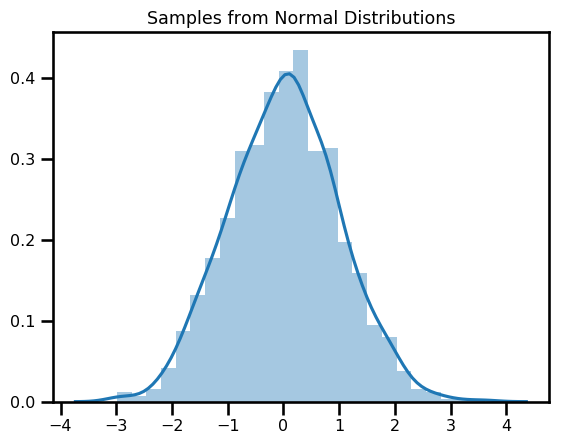

In [59]:
norm_dist = tfd.Normal(loc=0.0,scale=1.0)
sns.distplot(norm_dist.sample(1000));
plt.title("Samples from Normal Distributions")
plt.show()

In [61]:
# create a batch of three normal distributions
norm_b3 = tfd.Normal(loc=[0.0,2.0,4.0],scale=1.0)
samples = norm_b3.sample(1000)
print(samples.shape)

(1000, 3)


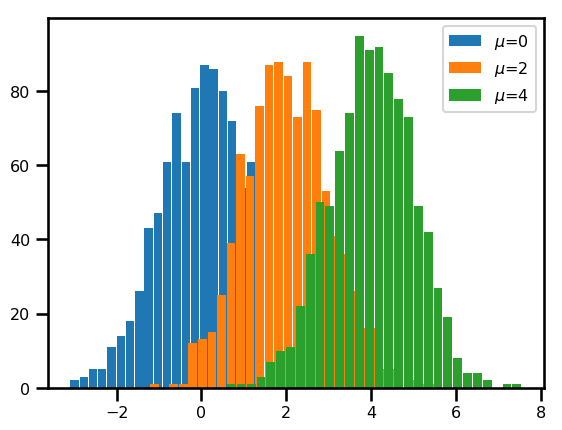

In [72]:
for i in range(3):
  plt.hist(samples[:,i],rwidth=.9,bins=30,label=r"$ \mu $="+str(i*2))
plt.legend()
plt.show()

In [73]:
# probability and log prob of a point
print("prob",norm_dist.prob(0.0))
print("logProb",norm_dist.log_prob(0.0))

# logprob for many points
# A batch of normals gives a batch of log_probs.
print(norm_b3.log_prob([-2.5, 0., 2.5]))

prob tf.Tensor(0.3989423, shape=(), dtype=float32)
logProb tf.Tensor(-0.9189385, shape=(), dtype=float32)
tf.Tensor([-4.0439386 -2.9189386 -2.0439386], shape=(3,), dtype=float32)


In [77]:
norm_b3.log_prob([[2.0],[1.0]])

<tf.Tensor: id=73366, shape=(2, 3), dtype=float32, numpy=
array([[-2.9189386, -0.9189385, -2.9189386],
       [-1.4189385, -1.4189385, -5.4189386]], dtype=float32)>

In [80]:
x = np.linspace(0.0,6.0,200)
out = norm_b3.log_prob(x[:,np.newaxis])
out.shape

TensorShape([Dimension(200), Dimension(3)])

**Multivariate Normal Distribution**

In [82]:
mvnd = tfd.MultivariateNormalDiag(loc=[1.0,2.0],scale_diag=[1.0,1.3])
mv_samples= mvnd.sample(1000)
#### event shape
print(mvnd)
print(mv_samples.shape)

tfp.distributions.MultivariateNormalDiag("MultivariateNormalDiag/", batch_shape=[], event_shape=[2], dtype=float32)
(1000, 2)


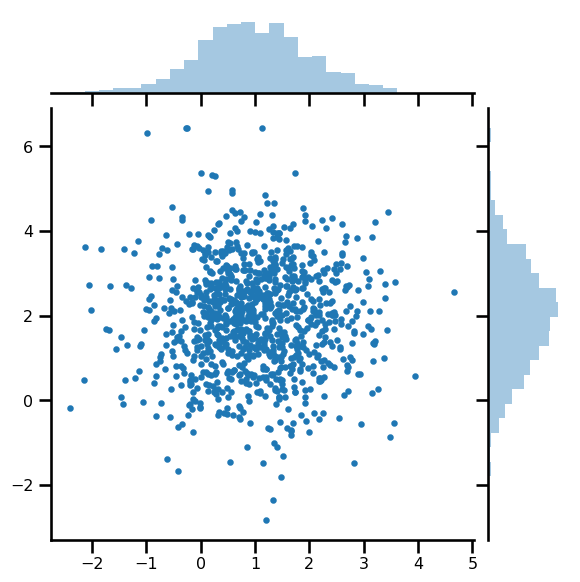

In [87]:
sns.jointplot(mv_samples[:,0],mv_samples[:,1],kind="scatter",s=10)

---
### LKJ

> While the inverse-Wishart distribution is the conjugate prior for the covariance matrix of a multivariate normal distribution, it is not very well-suited to modern Bayesian computational methods. For this reason, the LKJ prior is recommended when modeling the covariance matrix of a multivariate normal distribution.

---



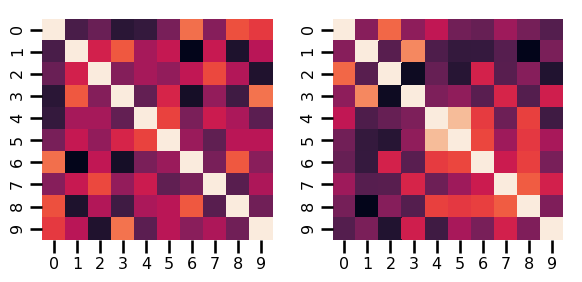

In [107]:
fig, ax= plt.subplots(nrows=1, ncols=2,figsize=(6,3))

lkj = tfd.LKJ(dimension=10,concentration=[1.5,.05])

sns.heatmap(lkj.sample()[0],ax = ax[0],cbar=False)
sns.heatmap(lkj.sample()[1],ax = ax[1],cbar=False)
fig.tight_layout()
plt.show()

In [0]:
xs = np.linspace(0.0,6.0,200).reshape([-1,1])
kernel = tfp.positive_semidefinite_kernels.ExponentiatedQuadratic()
gs = tfd.GaussianProcess(kernel,index_points=xs)

In [120]:
gs.sample(2)

<tf.Tensor: id=99438, shape=(2, 200), dtype=float64, numpy=
array([[ 0.87648382,  0.84269449,  0.80801129,  0.77093379,  0.72869785,
         0.68631232,  0.64197484,  0.59386933,  0.54396653,  0.49258291,
         0.43798984,  0.37989325,  0.3222865 ,  0.26134364,  0.19605352,
         0.13202551,  0.06573819, -0.00309056, -0.07282313, -0.14347606,
        -0.21737955, -0.29271483, -0.36688605, -0.44537535, -0.52368964,
        -0.60244727, -0.68287846, -0.76266296, -0.8450781 , -0.92448698,
        -1.00647688, -1.08893768, -1.17322122, -1.25390026, -1.33477765,
        -1.41743727, -1.49660087, -1.57619337, -1.65477089, -1.73448897,
        -1.81049035, -1.88687452, -1.95935936, -2.03222014, -2.10143978,
        -2.16899847, -2.23670016, -2.29969843, -2.36138472, -2.41908337,
        -2.47551914, -2.52794696, -2.5806806 , -2.6301997 , -2.67144855,
        -2.7143736 , -2.75296371, -2.78930302, -2.82188001, -2.84923166,
        -2.8745832 , -2.89564532, -2.91368642, -2.9287621 , -2.9

### Vectorize code

In [35]:
mat = tf.random.normal([1000,100,100])
vec = tf.random.normal([1000,100,1])

def forloop():
  for i in range(1000):
    tf.linalg.solve(mat[i,:,:],vec[i,:,:])
    
    
def vecloop():
  tf.linalg.solve(mat,vec)
    
%timeit forloop()
%timeit vecloop()

1 loop, best of 3: 340 ms per loop
10 loops, best of 3: 70.7 ms per loop


**Automatic Differentiation**

In [38]:
a = tf.Variable(np.pi)
b = tf.Variable(np.e)

with tf.GradientTape() as tape:
  c= .5*(a**2 + b**2)
tape.gradient(c,[a,b])
  

[<tf.Tensor: id=72721, shape=(), dtype=float32, numpy=3.1415927>,
 <tf.Tensor: id=72745, shape=(), dtype=float32, numpy=2.7182817>]